# Linear Regression
### Simple linear regression

In [108]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### exploring our dataset

In [110]:
df = pd.read_csv ("house_price_processed.csv")
df.head ()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.192000,23.0,0.049347,4.0875,True,False,False,True
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.172800,42.0,0.046146,4.9675,False,True,False,False
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,13.041605,38.0,0.045764,4.9675,False,False,False,False
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.267200,45.0,0.047151,6.0650,True,True,False,False
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.289600,55.0,0.039474,6.0625,False,True,False,False


In [111]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     506 non-null    float64
 1   crime_rate                506 non-null    float64
 2   resid_area                506 non-null    float64
 3   air_qual                  506 non-null    float64
 4   room_num                  506 non-null    float64
 5   age                       506 non-null    float64
 6   teachers                  506 non-null    float64
 7   poor_prop                 506 non-null    float64
 8   n_hos_beds                506 non-null    float64
 9   n_hot_rooms               506 non-null    float64
 10  rainfall                  506 non-null    float64
 11  parks                     506 non-null    float64
 12  avg_dist                  506 non-null    float64
 13  airport_YES               506 non-null    bool   
 14  waterbody_

In [112]:
df.describe ()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.732994,39.253324,0.054454,3.795104
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,1.676809,12.409479,0.010632,2.105859
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,20.000000,0.033292,1.127500
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.090909,0.053507,3.207500
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.168200,50.000000,0.061397,5.187500
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,15.400000,60.000000,0.086711,12.127500


### splitting our dataset

In [113]:
x = df["room_num"]
y = df["price"]

In [117]:
# sklearn requires our x to be a 2d array
x = x.values.reshape (-1, 1)

In [118]:
## splitting our dataset into train and test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [120]:
x_test.shape

(102, 1)

### Modelling

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
# create linearregression model
model = LinearRegression ()
model.fit (x_train, y_train)

LinearRegression()

In [124]:
intercept = model.intercept_
print (intercept)

-36.21968671198458


In [125]:
coef = model.coef_

In [126]:
coef

array([9.34490772])

### making predictions on our test dataset

In [127]:
y_pred = model.predict (x_test)
y_pred

array([23.73724121, 26.93319965, 19.69089617, 20.4571786 , 22.62519719,
       22.45698885, 19.04609753, 21.47577354, 21.98974346, 20.1020721 ,
       19.39185912, 19.88713923,  6.00995127, 22.01777819, 17.12104654,
       29.00776916, 18.71902576,  9.38346295, 37.37146157, 21.57856752,
       22.09253745, 24.35400512, 17.16777108, 25.39128987, 19.90582904,
       14.49512747, 18.67230122, 26.65285242, 19.47596329, 17.92470861,
       15.85013909, 23.83069028, 32.11962343, 13.88770847, 19.87779432,
       17.13039145, 30.92347524, 18.62557669, 20.44783369, 22.13926199,
       14.14936589, 27.78358625, 38.8573019 , 16.05572706, 23.74658612,
       17.16777108, 17.05563219, 23.74658612, 21.41035919, 25.22308153,
       19.93386377, 28.89563027, 21.17673649, 27.14813252, 33.58677394,
       22.7653708 , 21.89629439, 27.89572514, 23.4849287 , 16.15852105,
       26.97057928, 31.52154934, 25.00814866, 14.7661298 , 25.26046117,
       13.71950013, 24.25121113, 22.67192173, 25.40997969, 19.62

In [130]:
pd.DataFrame ({"Actual": y_test[:15], "Pred": y_pred[:15]})

,Actual,Pred
173,23.6,23.737241
274,32.4,26.933200
491,13.6,19.690896
72,22.8,20.457179
452,16.1,22.625197
76,20.0,22.456989
316,17.8,19.046098
140,14.0,21.475774
471,19.6,21.989743
500,16.8,20.102072


### Evaluating our model

In [131]:
from sklearn.metrics import r2_score
r2_score (y_test, y_pred)

0.3676692756441877

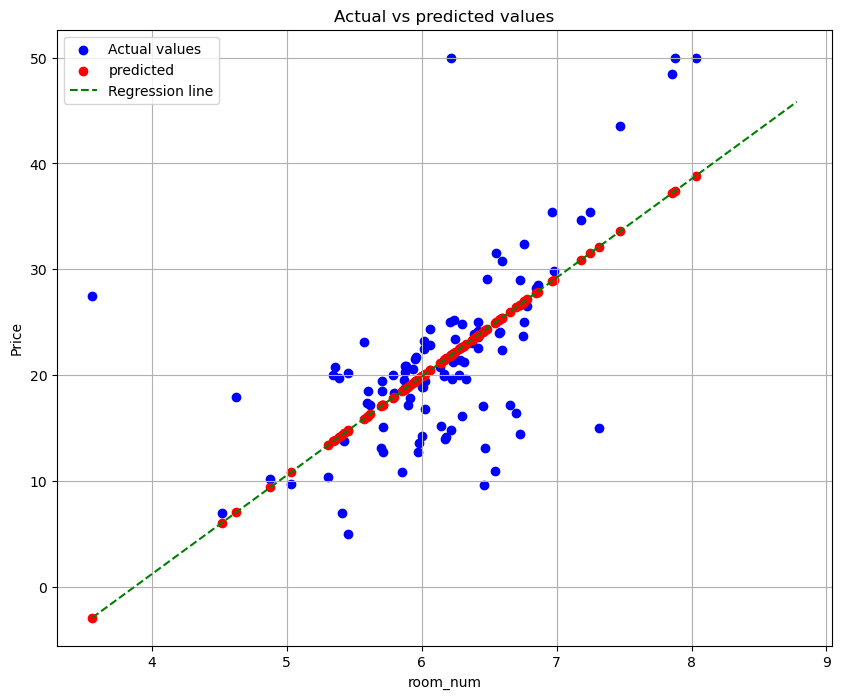

In [134]:
# plotting 
plt.figure (figsize = (10, 8))

# plot the actual values
plt.scatter (x_test, y_test, color = "blue", label = "Actual values")

# plot the predicted values
plt.scatter (x_test, y_pred, color = "red", label = "predicted")

# plot the regression line
x_range = np.linspace (x.min (), x.max (), 100).reshape (-1,1)
y_range = model.predict (x_range)

plt.plot (x_range, y_range, color = "green", linestyle = "--", label = "Regression line")

# lables and title
plt.xlabel ("room_num")
plt.ylabel ("Price")
plt.title ("Actual vs predicted values")
plt.legend ()
plt.grid (True)

plt.show ()